# Advanced Dataframes Exercises

## Run python -m pip install mysqlclient pymysql from your terminal to install pymysql and the mysqlclient.

## Create a notebook or python script named advanced_dataframes to do your work in for these exercises.

In [79]:
import pandas as pd
import numpy as np
from env import host, password, username

In [12]:
# 1. Create a function named get_db_url. It should accept a username, 
# hostname, password, and database name and return a url connection 
# string formatted like in the example at the start of this lesson.

def get_db_url(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
url = get_db_url('employees')

In [13]:
# 2. Use your function to obtain a connection to the employees database.

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [14]:
# 3. Once you have successfully run a query:
# -a. Intentionally make a typo in the database url. What kind of 
# error message do you see?

url_error = get_db_url('employes', username=username, host=host, password=password)

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url_error)

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'florence05'@'%' to database 'employes'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [15]:
# b. Intentionally make an error in your SQL query. What does the 
# error message look like?

pd.read_sql('SELECT * FROM employees LIMT 5 OFFSET 50', url)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '5 OFFSET 50' at line 1")
[SQL: SELECT * FROM employees LIMT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [16]:
# 4. Read the employees and titles tables into two separate DataFrames.

employees_df = pd.read_sql('SELECT * FROM employees', url)
employees_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [17]:
titles_df = pd.read_sql('SELECT * FROM titles', url)
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [18]:
# 5. How many rows and columns do you have in each DataFrame? Is that 
# what you expected?

employees_df.shape, titles_df.shape

((300024, 6), (443308, 4))

In [19]:
# 6. Display the summary statistics for each DataFrame.

employees_df.describe(exclude = np.number)

,birth_date,first_name,last_name,gender,hire_date
count,300024,300024,300024,300024,300024
unique,4750,1275,1637,2,5434
top,1952-03-08,Shahab,Baba,M,1985-06-20
freq,95,295,226,179973,132


In [20]:
titles_df.dtypes

emp_no        int64
title        object
from_date    object
to_date      object
dtype: object

In [21]:
# 7. How many unique titles are in the titles DataFrame?

titles_df.title.unique().size

7

In [22]:
# 8. What is the oldest date in the to_date column?

titles_df.to_date.max()

datetime.date(9999, 1, 1)

In [23]:
# 9. What is the most recent date in the to_date column?

titles_df.to_date.min()

datetime.date(1985, 3, 1)

# Exercises II

In [24]:
# 1. Copy the users and roles DataFrames from the examples above.

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})


In [25]:
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [26]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [27]:
# 2. What is the result of using a right join on the DataFrames?

users.merge(roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [28]:
# 3. What is the result of using an outer join on the DataFrames?

(users.merge
    (roles, left_on='role_id', right_on='id', how='outer')
    .drop(columns='role_id')
    .rename(columns={'id_x': 'id', 'name_x': 'employee', 'id_y': 'role_id', 'name_y': 'role'})
)

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


In [29]:
# 4. What happens if you drop the foreign keys from the DataFrames 
# and try to merge them?

users.drop(columns='role_id')
roles.drop(columns='id')

users.merge(roles)

,id,name,role_id


In [30]:
# 5. Load the mpg dataset from PyDataset.

from pydataset import data
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [31]:
# 6. Output and read the documentation for the mpg dataset.

data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [32]:
# 7. How many rows and columns are in the dataset?

mpg_df.shape

(234, 11)

In [33]:
# 8. Check out your column names and perform any cleanup you may want 
# on them.

mpg_df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [34]:
mpg_df = mpg_df.rename(columns={'cty': 'city', 'hwy': 'highway', 'fl': 'fuel'})
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fuel,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [35]:
# 9. Display the summary statistics for the dataset.

mpg_df.describe()

,displ,year,cyl,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [36]:
# 10. How many different manufacturers are there?

mpg_df.manufacturer.nunique()

15

In [37]:
# 11. How many different models are there?

mpg_df.model.nunique()

38

In [38]:
# 12. Create a column named mileage_difference like you did in the 
# DataFrames exercises; this column should contain the difference 
# between highway and city mileage for each car.

mpg_df['mileage_difference'] = mpg_df.highway - mpg_df.city
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fuel,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


In [39]:
# 13. Create a column named average_mileage like you did in the 
# DataFrames exercises; this is the mean of the city and highway 
# mileage.

mpg_df['average_mileage'] = (mpg_df.city + mpg_df.highway) / 2
mpg_df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fuel,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0


In [40]:
# 14. Create a new column on the mpg dataset named is_automatic that 
# holds boolean values denoting whether the car has an automatic 
# transmission.

mpg_df['is_automatic'] = mpg_df.trans.str.startswith('a')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


In [41]:
# 15. Using the mpg dataset, find out which which manufacturer has the
# best miles per gallon on average?

mpg_df.groupby('manufacturer').average_mileage.agg(['mean']).nlargest(1, 'mean', keep='all')

,mean
manufacturer,
honda,28.5


In [42]:
# 16. Do automatic or manual cars have better miles per gallon?

mpg_df.groupby('is_automatic').average_mileage.agg(['mean']).sort_values(by='mean', ascending=False)

,mean
is_automatic,
False,22.227273
True,19.130573


# Exercises III

In [77]:
# 1. Use your get_db_url function to help you explore the data from 
# the chipotle database.

def get_db_url(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
url = get_db_url('chipotle')

chipotle_df = pd.read_sql('SELECT * FROM orders', url)
chipotle_df.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [78]:
# 2. What is the total price for each order?

chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype(float)

chipotle_df.groupby('order_id').item_price.agg(['sum'])

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [45]:
# 3. What are the most popular 3 items?

chipotle_df.groupby(by='item_name').quantity.agg(['sum']).nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


In [46]:
# 4. Which item has produced the most revenue?

chipotle_df.groupby('item_name').item_price.agg(['sum']).nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73


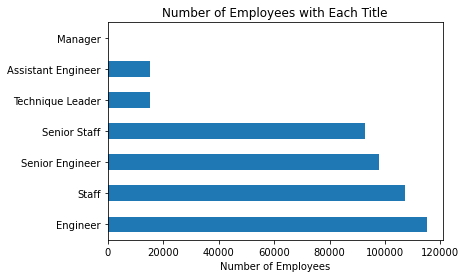

In [71]:
# 5. Using the titles DataFrame, visualize the number of employees 
# with each title.

import matplotlib.pyplot as plt

titles_df.title.value_counts().plot.barh()

plt.title('Number of Employees with Each Title')
plt.xlabel('Number of Employees')

plt.show()

In [49]:
# 6. Join the employees and titles DataFrames together.

e_and_t_df = employees_df.merge(titles_df, how='inner', on='emp_no')
e_and_t_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


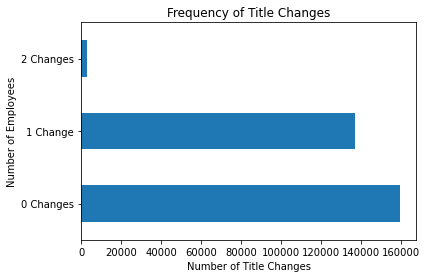

In [69]:
# 7. Visualize how frequently employees change titles.

e_and_t_df.groupby('emp_no').title.count().value_counts().plot.barh()

plt.title('Frequency of Title Changes')
plt.xlabel('Number of Title Changes')
plt.ylabel('Number of Employees')
plt.yticks(ticks=[0, 1, 2], labels=['0 Changes', '1 Change', '2 Changes'])

plt.show()

In [70]:
# 8. For each title, find the hire date of the employee that was hired
# most recently with that title.

e_and_t_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [83]:
# 9. Write the code necessary to create a cross tabulation of the 
# number of titles by department. (Hint: this will involve a 
# combination of SQL code to pull the necessary data and python/pandas 
# code to perform the manipulations.)

def get_db_url(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
# SQL query
    
titles_query = '''
                SELECT titles.emp_no, 
                titles.title, 
                titles.to_date, 
                titles.from_date, 
                departments.dept_name
                FROM titles
                JOIN dept_emp USING (emp_no)
                JOIN departments USING (dept_no); 
                '''

# pull SQL query into a dataframe

titles_df = pd.read_sql(titles_query, get_db_url('employees'))
titles_df.head()

,emp_no,title,to_date,from_date,dept_name
0,10011,Staff,1996-11-09,1990-01-22,Customer Service
1,10038,Senior Staff,9999-01-01,1996-09-20,Customer Service
2,10038,Staff,1996-09-20,1989-09-20,Customer Service
3,10049,Senior Staff,9999-01-01,2000-05-04,Customer Service
4,10049,Staff,2000-05-04,1992-05-04,Customer Service


In [85]:
# filter for currently held titles

current_titles = titles_df[titles_df.to_date == titles_df.to_date.max()]
current_titles.head()

,emp_no,title,to_date,from_date,dept_name
1,10038,Senior Staff,9999-01-01,1996-09-20,Customer Service
3,10049,Senior Staff,9999-01-01,2000-05-04,Customer Service
5,10060,Senior Staff,9999-01-01,1996-05-28,Customer Service
7,10088,Senior Staff,9999-01-01,1993-09-02,Customer Service
11,10112,Staff,9999-01-01,1998-05-01,Customer Service


In [87]:
# create cross tabulation of currently held titles by department

titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0
